<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fertilization Rate (%)               1500 non-null   float64
 1   Blastulation_Rate (%)                1500 non-null   float64
 2   Semen_Collection_Method              1500 non-null   object 
 3   Ejaculatory_Abstinence (days)        1500 non-null   float64
 4   Semen_Volume (ml)                    1500 non-null   float64
 5   Seminal_pH                           1500 non-null   float64
 6   Viscosity                            1500 non-null   object 
 7   Sperm_Concentration (million/ml)     1500 non-null   float64
 8   Total_Sperm_Count (million)          1500 non-null   float64
 9   Sperm_Prog_Motility (%)              1500 non-null   float64
 10  Sperm_NonProg_Motility (%)           1500 non-null   float64
 11  Immotile_Sperm (%)            

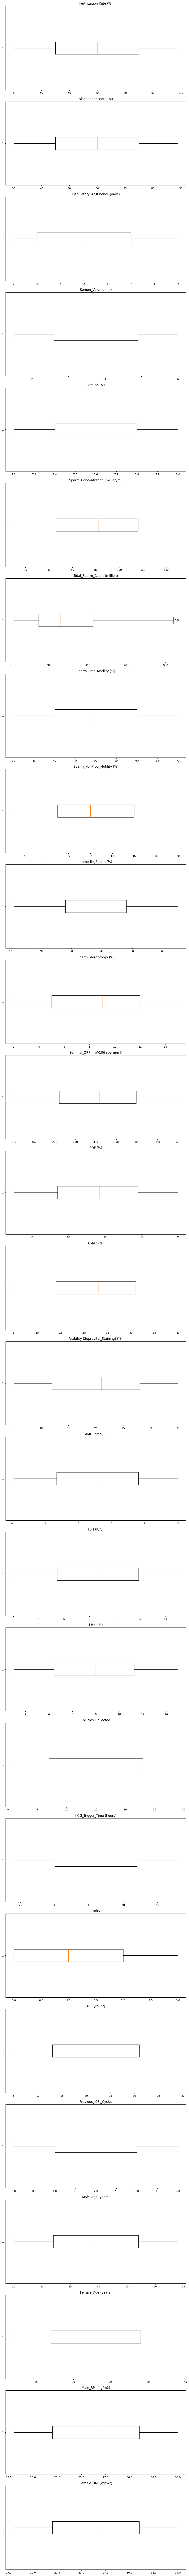

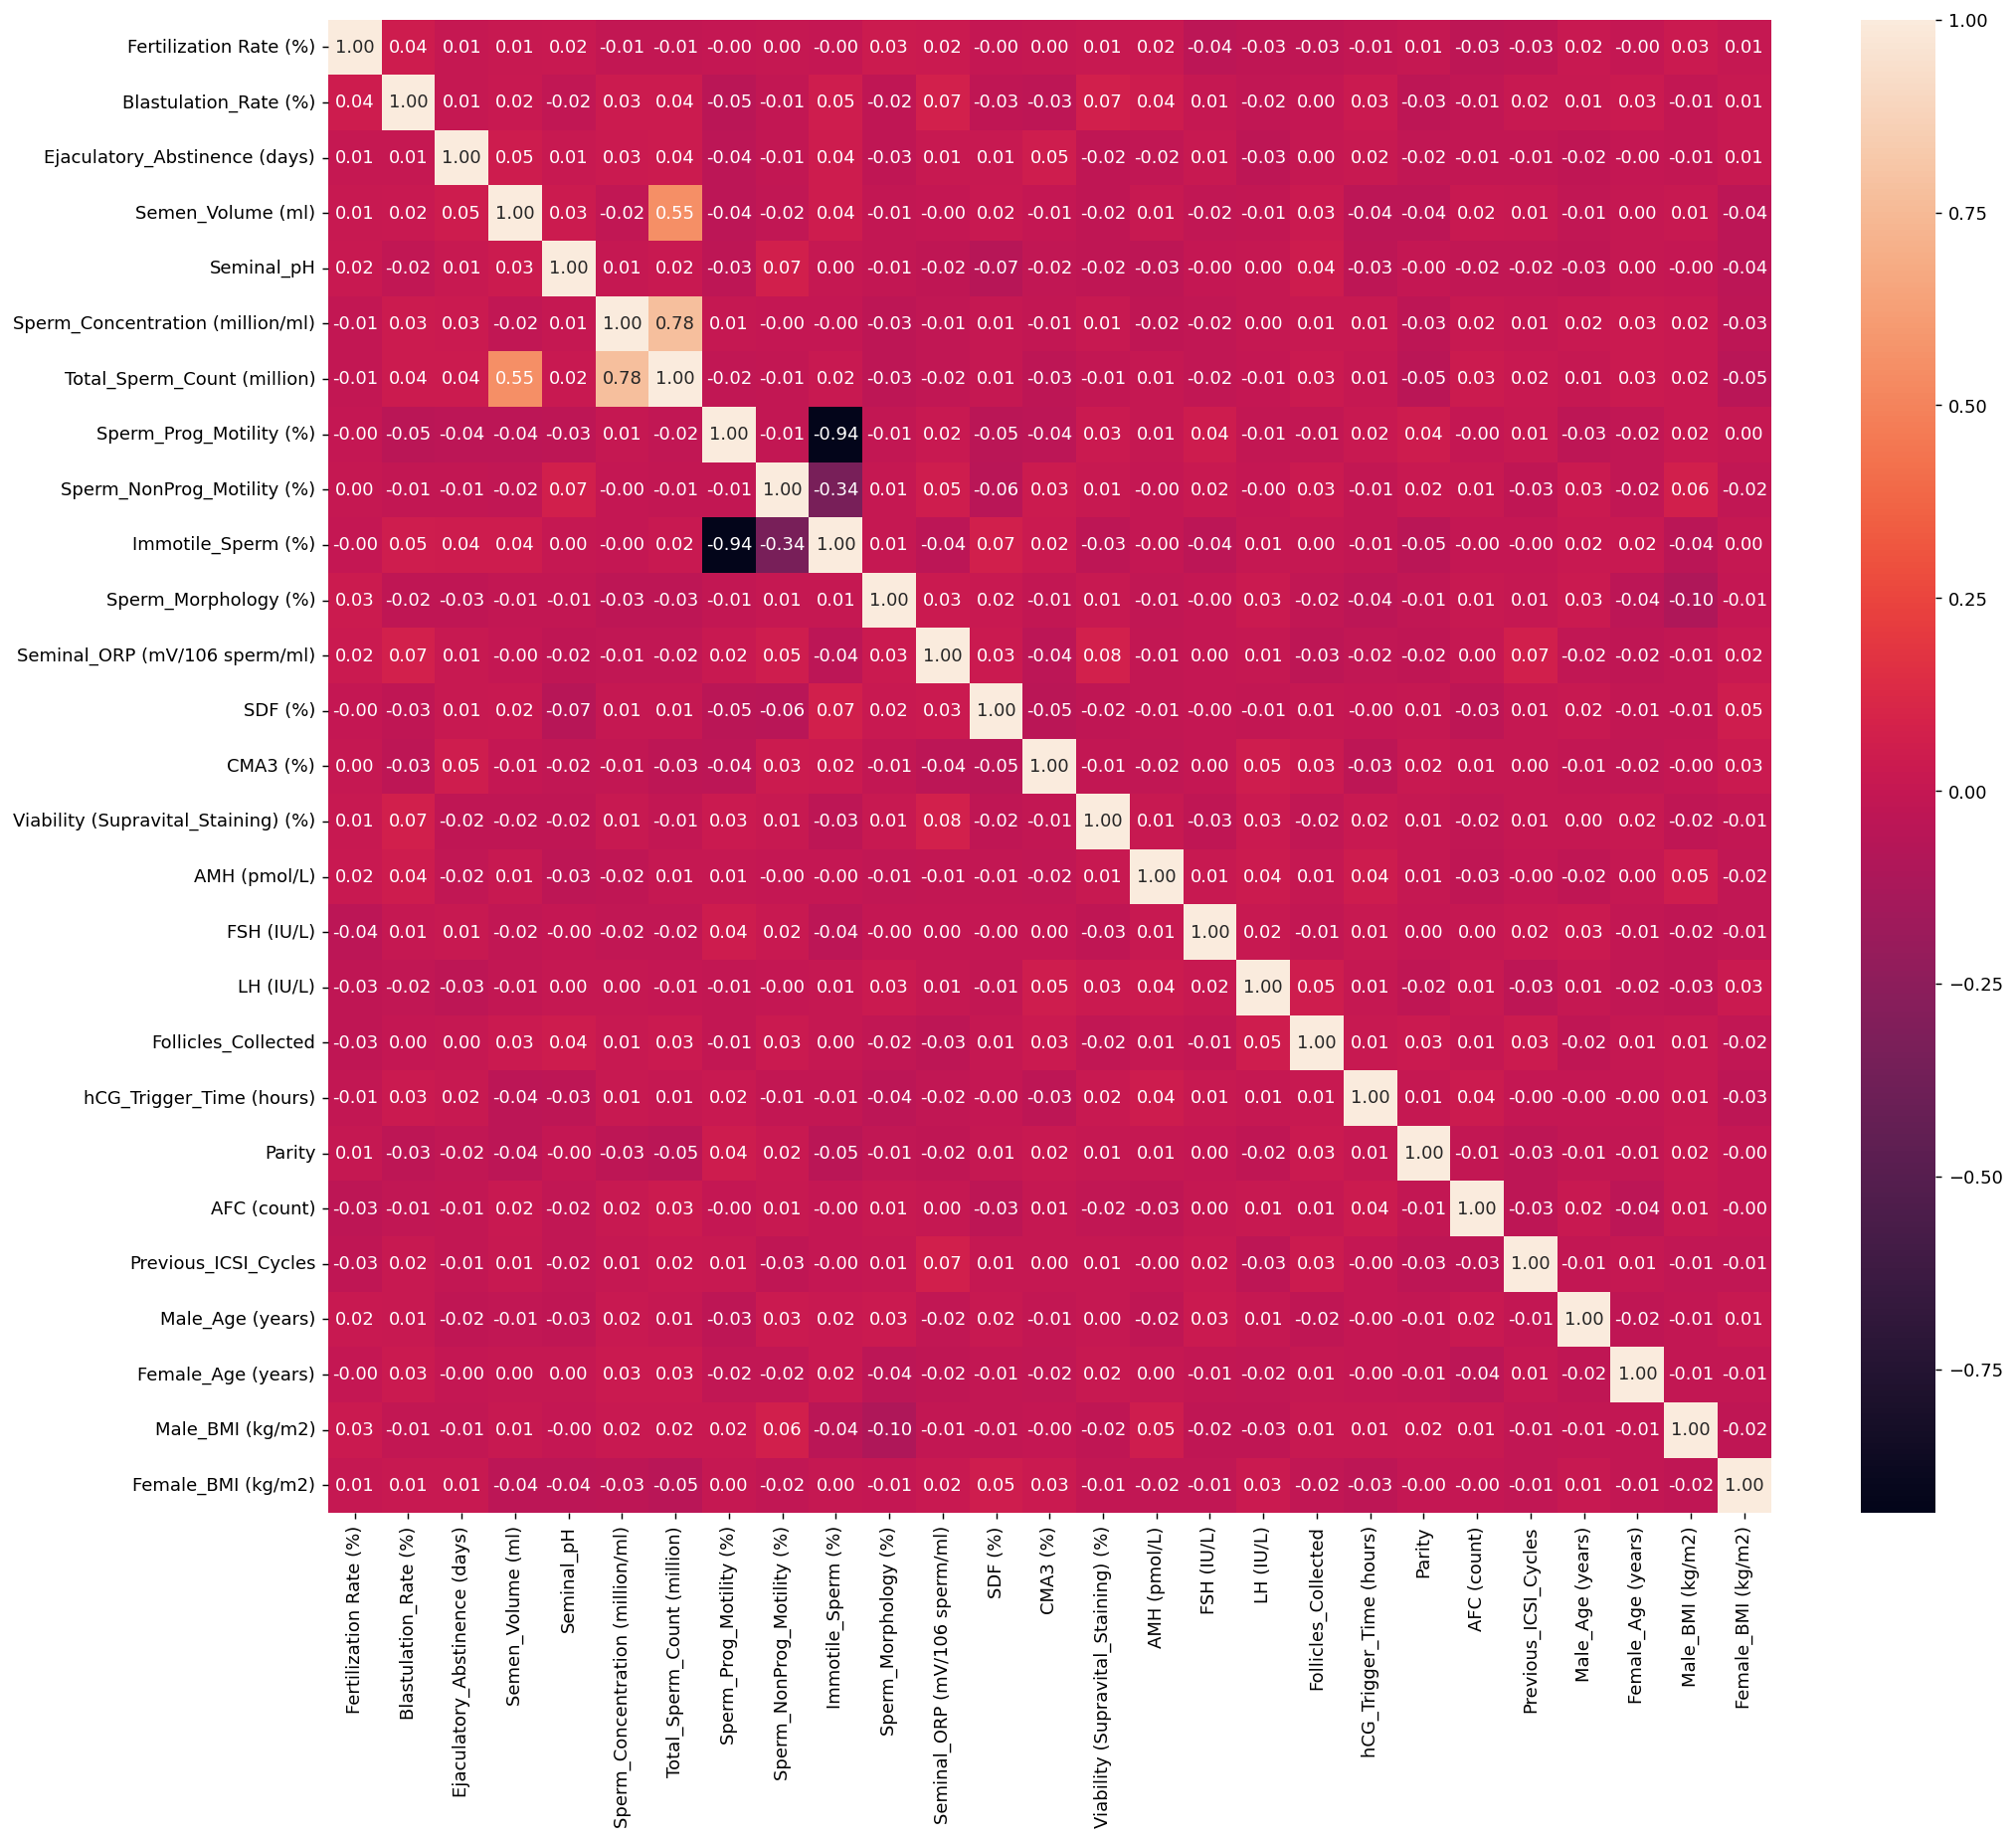

Semen_Collection_Method                  int64
Ejaculatory_Abstinence (days)          float64
Semen_Volume (ml)                      float64
Seminal_pH                             float64
Viscosity                                int64
Sperm_Concentration (million/ml)       float64
Total_Sperm_Count (million)            float64
Sperm_Prog_Motility (%)                float64
Sperm_NonProg_Motility (%)             float64
Immotile_Sperm (%)                     float64
Sperm_Morphology (%)                   float64
Round_Cells                              int64
Seminal_ORP (mV/106 sperm/ml)          float64
SDF (%)                                float64
CMA3 (%)                               float64
Viability (Supravital_Staining) (%)    float64
Antisperm_Antibodies                     int64
Sperm_Agglutination                      int64
Semen_Microbiology                       int64
Blood_Microbiology                       int64
Male_Infertility                         int64
Varicocele   

In [1]:
## DATA PREPROCESSING

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Simulated_Data.csv', sep=";" , skiprows=1 , decimal=",", encoding="utf-8" , usecols=lambda col: col != 'Patient_ID')
df.info()
## Dropping null values from the dataset
df = df.dropna(how="all")
df.isnull().sum()
## Presenting data
df.describe()

## Checking for outliers
numeric_df = df.select_dtypes(include=['number'])
fig, axs = plt.subplots(len(numeric_df.columns), figsize=(10 , 5 *len(numeric_df.columns)))

## Handle the case where there is only one column
if len(numeric_df.columns) == 1:
    axs = [axs]

i = 0
for i, col in enumerate(numeric_df.columns):
    axs[i].boxplot(numeric_df[col].dropna(), vert=False)
    axs[i].set_title(col)
    i+=1

plt.tight_layout()
plt.show()

## After the above runs, we have only two outliers within Total_Sperm_Count (million)  
# The approach here is to keep these outliers and see what happens if it skews the model we will either 
# remove or cap them to the nearest non-outlier value

## In the below, we are checking which features correlate with each other
corr = numeric_df.corr()
plt.figure(figsize=(18, 15), dpi=130)
sns.heatmap(numeric_df.corr(), annot=True, fmt= '.2f')
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

##Based on the heatmap above, the first test would be to keep all features 
#Second test we're going to run is dropping one of the features
#that are correlated to non-target variable features 
#This is done before we do any other column manipulation 

###columns_to_drop = df.drop(columns=["Immotile_Sperm (%)"])

## Based on the above heatmap, we can see that there aren't any strong correlations 
# between any of the features and the target values Fert and Blast, 

#after the above we then separate the targets from input features 
x = df.drop(columns=["Fertilization Rate (%)" , "Blastulation_Rate (%)"])
y = df[["Fertilization Rate (%)","Blastulation_Rate (%)"]]

## In the below we encode our categorical columns 
le_col= {}
for col in x.columns:
    if x[col].dtype == 'object':
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col].astype(str))
        le_col[col] = le

## Convert encoded columns to dataframes to inspect 
# Making sure all the data is correct and no nulls for input features 
encoded_df = x.copy()
encoded_df.head()
print(encoded_df.dtypes)
print(encoded_df.describe())
print(encoded_df.isnull().sum())

## Making sure target variables are correct with no nulls 
print(y.head())          # sample values
print(y.dtypes)          # ensure numeric
print(y.nunique())
print(y.isnull().sum())

In [3]:
#SPLITTING UP DATA 

from sklearn.model_selection import train_test_split

## Splitting the data to train and temp (80% = train) (20% = holdout)
x_temp , x_holdout, y_temp,y_holdout = train_test_split(
    encoded_df,y, test_size=0.2, random_state=42
)

## Splitting the data from train and temp into (train = 70%) and (test = 30%)
x_train, x_test , y_train, y_test = train_test_split(
    encoded_df, y, test_size=0.3, random_state=42
)

## Splitting the data from train, split off validation set, which is 20% of train
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


print("Train: " , x_train.shape)
print("Validation: ", x_val.shape)
print("Test: ", x_test.shape)
print("Holdout: ", x_holdout.shape)


Train:  (840, 39)
Validation:  (210, 39)
Test:  (450, 39)
Holdout:  (300, 39)


In [2]:
git branch 


SyntaxError: invalid syntax (3357682566.py, line 1)